<h1 align="center"> Simple world happiness report data analysis</h1> 
<h5 align="center"> Kamel Chahbi </h5> 

***
# __Introduction__
<div style="text-align: justify"> In this project, I analyzed the data from the 2017 world happiness report published by the United Nations Sustainable Development Solutions Network. This notebook will cover in details the work that is achieved while using different python libraries, and it is organized as follows: </div>
 

* Importing, cleaning, and numerical summaries
* Indexing and grouping
* Plot 
      - Bar plot of the Happiness Score
      - Histogram of Job Satisfaction
      - Pairwise Scatter plots
      - Correlation
* Probabilities
* Matrices
***

# __A-Importing, cleaning and numerical summaries__
* A.1/2- The data set is stored in a comma-separated values file (.CSV). The Python library Pandas allow us to import the data for a CSV file to Pandas DataFrame and use it different functions, methods, and attributes to manipulate and analyze the data. First, we need to tell python that we need that Pandas library. The command in the following code cell will allow us to:
* Import the Pandas library and denoted it as pd, `import pandas as pd`.
* Import data for CSV file and store in DataFrame denoted by df, `pd.read_csv('data.csv')`.

Note: all the needed libraries are called in the first code cell.
<br>
<br>

In [1]:
import pandas as pd # pandas: data analysis library
import numpy as np # numpy: numerical computing library.
import seaborn as sns # seaborn: data visualization library
import matplotlib.pyplot as plt #matplotlib: data visualization library
%matplotlib inline

In [2]:
df = pd.read_csv ('data.csv')

* A.3-  Now, data are stored in the `df` DataFrame. To consult the total number of observation we could use the property `count` applied to our data frame `df.count()`, which it will return the total number of observations in the data set.


In [3]:
df.count()

Country             153
Happiness Rank      153
Happiness Score     153
Economy             153
Family              153
Health              153
Freedom             153
Generosity          153
Corruption          153
Dystopia            153
Job Satisfaction    151
Region              153
dtype: int64

* A.4- The columns heads are stored in a one-dimensional array and they call to be seen using the index `columns` applied the DataFrame `df.columns`.


In [4]:
df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')

* A.5- To access the data type of the different observations we use simply the property `dtype`


In [5]:
df.dtypes

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object

* A.6- The above information could be also collected by using the pandas `info` method. This method gives a summary of the data set. We could also see that there is 2 missing data observation for Job satisfaction. We could also use the method `isnull` which returns a boolean same-sized object where the missed values will receive True and everywhere else false. Followed by `sum` method that returns the total number of values, hence the total number of missing data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
Country             153 non-null object
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(2)
memory usage: 14.4+ KB


In [7]:
df.isnull().sum()

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64

* A.7- The missing data for job satisfaction will be removed, we will use `dropna` method to perform this task. Where else the Pandas method `astype` can be used to change the data type, but in our case, the data type does not require data type change.

In [8]:
df.dropna(inplace=True) #inplace= True, means that we will modifie the dataframe in place

* A.8- The `describe` method is used to get the mean, minimum, and maximum of each column. Also, the methods `mean`,`min`,`max` could be used for the same purpose.

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


* A.9/10- To list the 10 happiest countries, ordered by their happiness score. First, we need to rearrange our data set and sort them following their happiness score. For that, we used the method `sort_values`. We will use the method `set_index` to change the DataFrame index to the country as they are mean data focuses. We will also use the method `head` to return the top 10 happiest countries, ordered by their happiness score.

* We will also use the method `tail` to return the top 10 least happy countries, ordered by their happiness score.

In [10]:
df.set_index('Country', inplace=True) 
df.sort_values(by=['Happiness Score'], inplace=True, ascending=False)

In [11]:
df['Happiness Score'].head(10)

Country
Norway         7.537
Denmark        7.522
Iceland        7.504
Switzerland    7.494
Finland        7.469
Netherlands    7.377
Canada         7.316
New Zealand    7.314
Australia      7.284
Sweden         7.284
Name: Happiness Score, dtype: float64

In [12]:
df['Happiness Score'].tail(10)

Country
Haiti                       3.603
Yemen                       3.593
Liberia                     3.533
Guinea                      3.507
Togo                        3.495
Rwanda                      3.471
Syria                       3.462
Tanzania                    3.349
Burundi                     2.905
Central African Republic    2.693
Name: Happiness Score, dtype: float64

***
# __B. Indexing and grouping__



* B.1- To group the data in separate CSV file for each region, I created a for loop to extract the data for the initial data frame corresponding to each region using the method `loc`, stored them in a different data frame for each region, and then stored the data in a CSV file. previously, I did change the white space` ` and dash `-` with an underscore `_` to use the region name as a data frame name, therefore, simplify the code and the for loop. The data is stored in a CSV file with the name `Region_name_Region.csv`, ex: `Western_Europe_Region.csv`.

 * By counting the number of countries in each region using `groupby method` and `count` we can notice that there is one country within the Europe region. Data from a single country in a region does not give meaningful information. We searched for the country name by extracting the index of the row with that the Europe region is assigned and it turns out that Ukraine is the country that is assigned to the Europe region. In our data set the European region is divided in two zones which are east and west, and since Ukraine geographically is situated in eastern Europe, therefore it will add it to this region in our data set. 

In [13]:
Re = df.groupby('Region')['Happiness Rank'].count()
print(Re.to_string())
print('The country which is in the Europe region is', df[df['Region'] == 'Europe'].index)

Region
Africa            43
Asia-Pacific      43
Eastern Europe    21
Europe             1
Latin America     22
North America      2
Western Europe    19
The country which is in the Europe region is Index(['Ukraine'], dtype='object', name='Country')


In [14]:
df.replace(' ', '_', regex=True, inplace=True) #Replace whiteto_strings with _ to be able to store variable
df.replace('-', '_', regex=True, inplace=True) #Replace - with _ to be able to store variable

df.loc ['Ukraine', 'Region'] = 'Eastern_Europe' #Add Ukraine to eastern european region

Region_List = ['Western_Europe', 'Eastern_Europe','Africa', 
               'North_America','Latin_America','Asia_Pacific'] # Regions list 

for i in Region_List:
    locals()[i] = df.loc [df.Region == i] # store data in speratly for each region
    locals()[i] . to_csv(i + '_' + 'Region.csv', encoding='utf-8') # write the data in CSV

* B.2- To compute the mean happiness score for each region, first I grouped the data by region and selected the happiness score columns using the `groupby` method. I computed the mean happiness score using the `mean` method and then sort the output using the `sort_values` method.

In [15]:
df.groupby('Region')[['Happiness Score']].mean().sort_values(by=['Happiness Score'], ascending=False)

,Happiness Score
Region,
North_America,7.154500
Western_Europe,6.880474
Latin_America,5.957818
Eastern_Europe,5.435182
Asia_Pacific,5.358326
Africa,4.254581


* B.3- To compute the number of countries in each region that have a happiness score above 6.0. First, I selected the data with a happiness score above 6.0 and the group them as we did in the previous example. Then, I applied the method `count` to count the number of countries in each region. The method `sort_values` and `rename` are for illustrative purposes.

In [16]:
df[df['Happiness Score']> 6.0].groupby('Region')[['Happiness Score']]\
.count()\
.sort_values(by=['Happiness Score'], ascending=False)\
.rename(columns={'Happiness Score':'Number of Country With a Happiness Score above 6'})

,Number of Country With a Happiness Score above 6
Region,
Western_Europe,17
Latin_America,13
Asia_Pacific,11
North_America,2
Eastern_Europe,1


* B.4- For this task, I preceded in the same way as the task before to group the data. I computed the maximum and the minimum happiness score by region values using the `max` and `min` methods, and computed the difference using the operator `-`. To print the region with the highest happiness score range I used `idxmax` that returns the index of the maximum value of the happiness score range.  

In [17]:
HR = df.groupby('Region')[['Happiness Score']].max().rename(columns={'Happiness Score':'Happiness Score Range ='})\
-df.groupby('Region')[['Happiness Score']].min().rename(columns={'Happiness Score':'Happiness Score Range ='})
print('The highest', HR.idxmax().to_string())
HR

The highest Happiness Score Range =    Asia_Pacific


,Happiness Score Range =
Region,
Africa,3.179
Asia_Pacific,3.852
Eastern_Europe,2.002
Latin_America,3.476
North_America,0.323
Western_Europe,2.342


***
# __C.Plot__
## C.1 Bar plot of the Happiness Score
I this section, I used mostly pandas plot with a seaborn layout. My approach will be illustrated in the code section.  

* C.1.1- Horizontal bar plot of the Happiness Score of the top 10 happiest countries

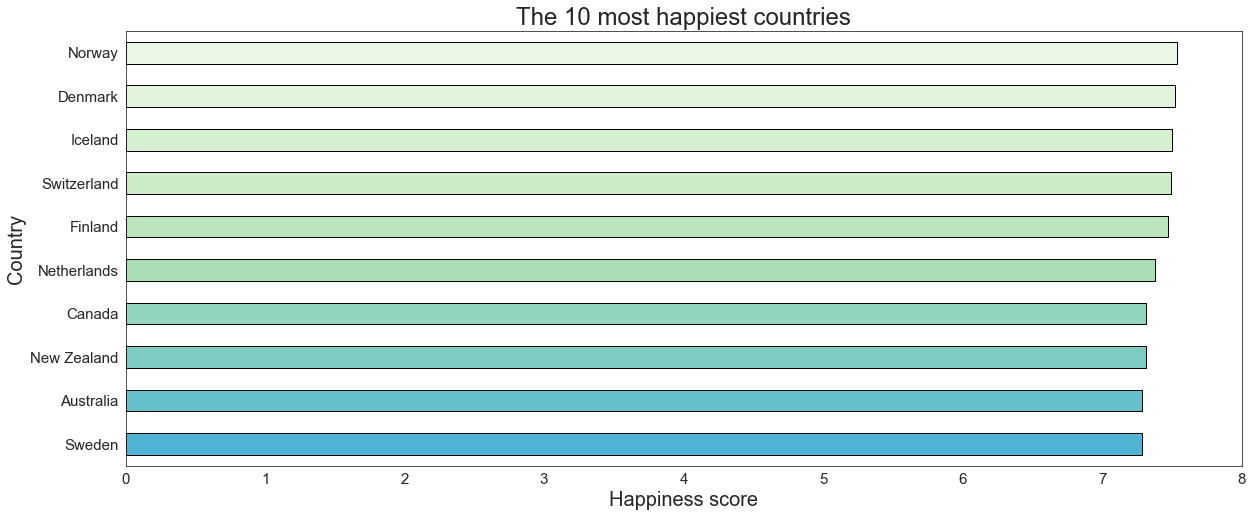

In [18]:
#defined sequential seaborn color palettes
colormap0 = reversed(sns.color_palette("GnBu_r", n_colors =15 )) 

# use seaborn layout with a white backround 
sns.set_style('white') 

# select the data of interesst and apply pandas plot method 
bar_plot = df['Happiness Score'].head(10).plot(kind='barh', # chose plot'bar' and figure size
                                               figsize=(20,8), # define figure size 
                                               edgecolor='black', # define the bars edge color 
                                               grid=False, # Remove the grid from the plot 
                                               color=colormap0, # define the plot colors 
                                               fontsize=15, # define the size of the font 
                                               xticks=np.arange(0, 9, step=1)) # define the values in the x axis 
# Set a title for the plot 
bar_plot.set_title('The 10 most happiest countries', fontsize=24)

# Set a x axis label
bar_plot.set_xlabel('Happiness score', fontsize=20)

# Set a x axis label
bar_plot.set_ylabel('Country', fontsize=20)

# invert the y axis to plot the bar with highiest values at the top
bar_plot.invert_yaxis()

sns.set()

* C.1.2- Stacked bar chart: The 10 happiest country by category

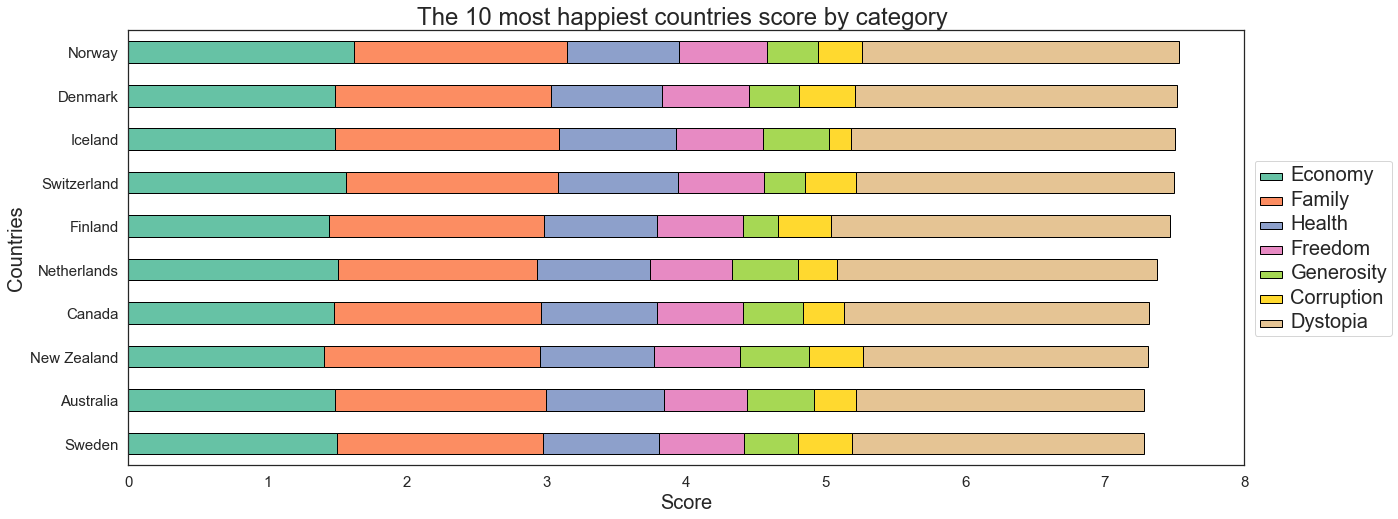

In [19]:
# Define the data by selecting the columns of our interest: Economy, Family.....
data_top= df.iloc[:, 2:9].head(10) 

sns.set_style('white')
colormap = sns.color_palette("Set2")

bar_plot = data_top.plot(kind='barh',
                         figsize=(20,8),
                         stacked=True, # Set the stacked as true to be able to plot stacked plot
                         edgecolor='black',
                         grid=False,
                         color=colormap,
                         fontsize=15,
                         xticks=np.arange(0, 9, step=1))

bar_plot.set_title('The 10 most happiest countries score by category ', fontsize=24)
bar_plot.set_xlabel('Score', fontsize=20)
bar_plot.set_ylabel('Countries', fontsize=20)

bar_plot.invert_yaxis()

# Here I used matplotlib legend method to move the legend out side the figure 
plt.legend(bbox_to_anchor=(1.01, 0.7), loc=2, borderaxespad=0.)

# Here I used matplotlib setp method to increase the font size of the legend text
plt.setp(bar_plot.get_legend().get_texts(), fontsize='20')

sns.set()

* C.1.3 - Stacked bar chart: African countries by category

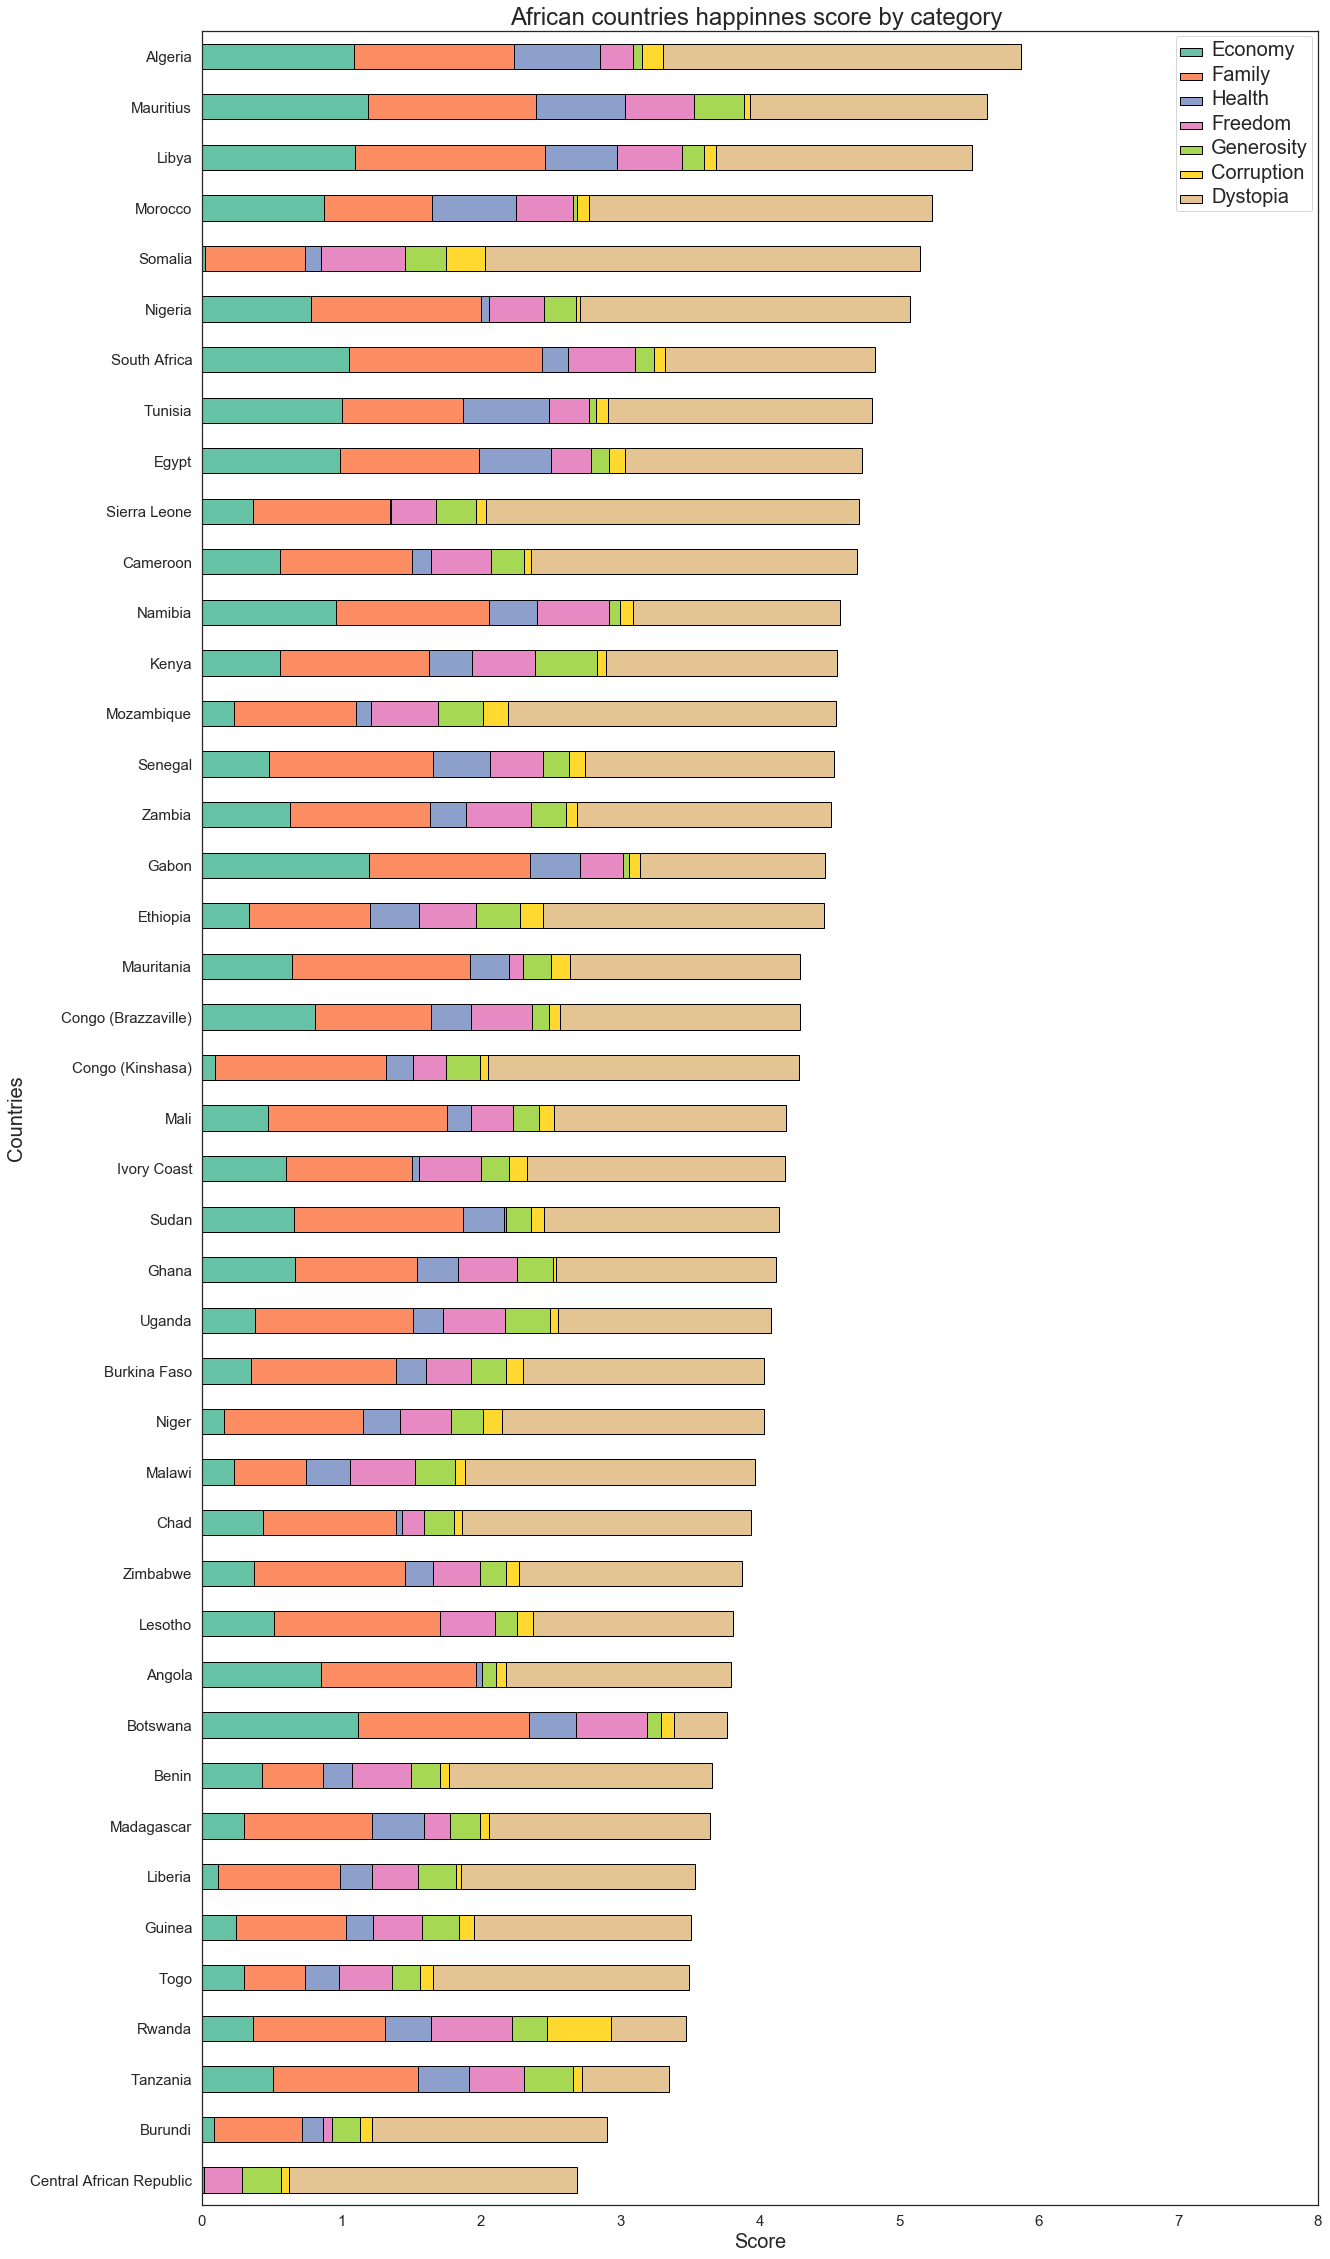

In [20]:
# We used the same code as the task before. I only changed the data set.

data_Africa= Africa.iloc[:, 2:9]

sns.set_style("white")
bar_plot = data_Africa.plot(kind='barh',
                            figsize=(20,40),
                            stacked=True,
                            edgecolor='black',
                            grid=False,
                            color=colormap,
                            fontsize=15,
                            xticks=np.arange(0, 9, step=1))

bar_plot.set_title('African countries happinnes score by category ', fontsize=24)
bar_plot.set_xlabel('Score', fontsize=20)
bar_plot.set_ylabel('Countries', fontsize=20)
bar_plot.invert_yaxis()

plt.setp(bar_plot.get_legend().get_texts(), fontsize='20')

sns.set()

## C.2 Histogram of Job Satisfaction

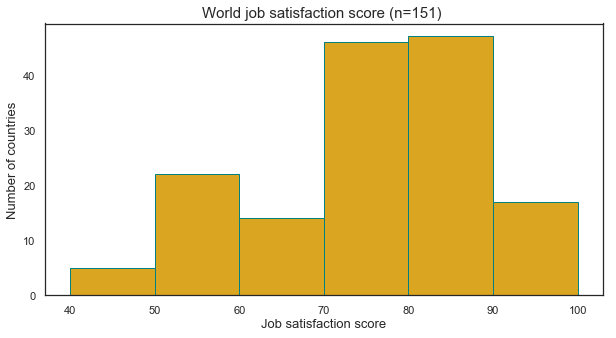

In [21]:
sns.set_style('white')

# selected the columns of job satisfaction and applied the plot method with histogram kind 
bar_plot = df['Job Satisfaction'].plot.hist(bins=np.arange(40, 110, step=10),# define the number of the bin and their distribution
                                            color='goldenrod',
                                            edgecolor='teal',
                                            figsize=(10,5),)

bar_plot.set_title('World job satisfaction score (n=151) ', fontsize=15)
bar_plot.set_xlabel('Job satisfaction score', fontsize=13)
bar_plot.set_ylabel('Number of countries', fontsize=13)

sns.set()

***
# C.3 Pairwise Scatter plots
I used the `pairplot` method to happiness score vs other categories in a single command.

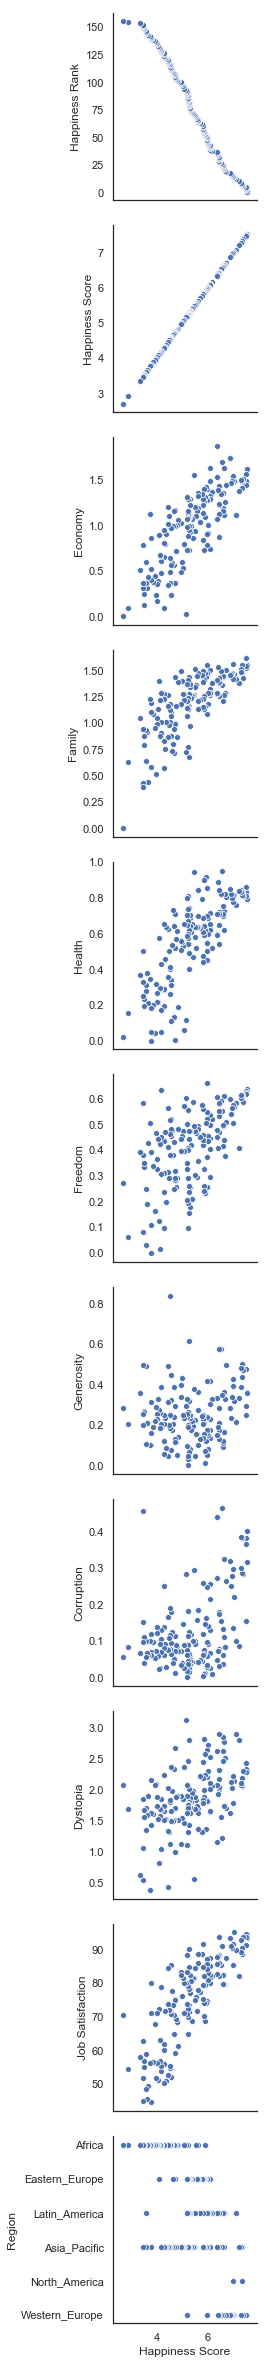

In [22]:
sns.set_style('white')
 
g= sns.pairplot(df.iloc[:,0:11], # Define the data 
                y_vars = df.iloc[:,0:11].columns.values, # Define the y variable in our case the categories columns
                x_vars = 'Happiness Score',# Define the x variable in our case the happiness score columns
                height = 3) 

sns.set()

## C.4 Correlation

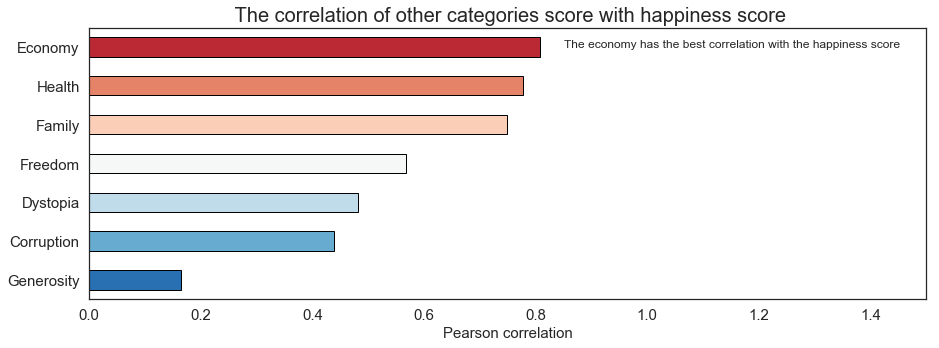

In [23]:
#g= sns.pairplot(df.iloc[:,1:9], y_vars=df.iloc[:,2:9].columns.values, x_vars='Happiness Score',height=6)
#g.map(sns.regplot, color="0.2",order=1)
#sns.set()

sns.set_style('white')

colormap2 = reversed(sns.color_palette("RdBu",n_colors =7))

# Compute the correlation between the categories using pearson method
corr= df.iloc[:,1:9].corr(method='pearson')

# chose from the dataframe the values of other categories correaltion with happiness score
# chose from the data frame the values of other categories correlation with the happiness score
corr_plot = corr.iloc[1:,0].sort_values().plot(kind='barh',edgecolor='black',figsize=(15,5),\
                                               grid=False,color=colormap2,fontsize=15, xlim=(0, 1.5))

corr_plot.set_title(' The correlation of other categories score with happiness score', fontsize=20)
corr_plot.set_xlabel('Pearson correlation', fontsize=15)

# Added text to the figure 
corr_plot.text(0.85,6, 'The economy has the best correlation with the happiness score')

sns.set()

***
# E. Probabilities
To Compute the probability that a randomly selected country with a happiness score over 6.0 and it is from Western Europe, I used a for loop and the pandas `sample` method that returns a random choice from the data subset of the contries with happiness score above 6. At each experiment, the region is compared using the if condition. if the random choice satisfies the probability condition the counter `WestE` increases by one. The probability is computed as the ratio between the random choice satisfying the condition and the number of experiments.


In [24]:
experiments = 1000
WestE = 0
for i in range(experiments):
    Random_choice = df[df['Happiness Score'] > 6].sample()
    if Random_choice.iloc[0,10] == 'Western_Europe'  :
        WestE += 1

# Probability         
P = WestE / experiments

#Printing the results 
print('The p(Western Europe | score > 6) by experimental probability =',"%.0f%%" % (100 * P))

WE = df[(df['Happiness Score'] > 6.0) & (df['Region'] == 'Western_Europe') ].groupby('Region')['Happiness Score'].count().sum()
All = df[df['Happiness Score'] > 6.0].groupby('Region')['Happiness Score'].count().sum()
p = WE/All

print('The p(Western Europe | score > 6) by theoretical probability=',"%.0f%%" % (100 * p))

The p(Western Europe | score > 6) by experimental probability = 39%
The p(Western Europe | score > 6) by theoretical probability= 39%


***
# F. Matrices
The matrix was created as follow: 
* Generate a matrix filled with zero of shape (152,7) and type object.
* Create a for loop to iterate over the row axis and fill the country list from the data set. 
* Create another for loop to iterate over the columns axis and fill the region.
* Create a condition to compare the country region in the data set with the region in the matrix if satisfied the matrix at position I, j will have a value of 1 else it will receive a value of 0

In [25]:
Matrix =np.zeros((152,7),dtype= object)

for i in np.arange(1, 152, 1):
    Matrix [i,0] = df.index[i-1]
    for j in np.arange(1, 7, 1):
        Matrix [0,j] = Region_List[j-1]
        if df.iloc[i-1,10] == Matrix [0,j]:
            Matrix [i,j] = 1
        else:
            Matrix [i,j] = 0 
            
# For illustration purpose
pd.DataFrame(Matrix, index=Matrix[:,0], columns=Matrix[0,:]).drop(index=0, columns=0)

# (df[['Region']].values == df.Region.unique()).astype(int)

,Western_Europe,Eastern_Europe,Africa,North_America,Latin_America,Asia_Pacific
Norway,1,0,0,0,0,0
Denmark,1,0,0,0,0,0
Iceland,1,0,0,0,0,0
Switzerland,1,0,0,0,0,0
Finland,1,0,0,0,0,0
Netherlands,1,0,0,0,0,0
Canada,0,0,0,1,0,0
New Zealand,0,0,0,0,0,1
Australia,0,0,0,0,0,1
Sweden,1,0,0,0,0,0
